In [18]:
!pip install jupyter scikit-learn nltk spacy matplotlib seaborn
!python -m spacy download en_core_web_sm


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 825.8 kB/s eta 0:00:16
      --------------------------------------- 0.2/12.8 MB 1.8 MB/s eta 0:00:08
     - -------------------------------------- 0.5/12.8 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 5.3 MB/s eta 0:00:03
     --------- ------------------------------ 3.0/12.8 MB 12.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 16.1 MB/s eta 0:00:01
     ------------------ --------------------- 6.1/12.8 MB 18.5 MB/s 

In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

nlp = spacy.load('en_core_web_sm')

# nltk.download('punkt')

In [26]:
# spaCy for lemmatization / stop word and excess symbol removal

def preprocess_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return " ".join(lemmatized)

In [27]:
notes = [
    "Artificial intelligence in software engineering is revolutionizing the way developers write code.",
    "Machine learning models are used to predict code outcomes and suggest optimizations.",
    "Natural language processing translates human language into executable code.",
    "Software development methodologies are being transformed by AI technologies.",
    "Predictive analytics in software engineering preempt potential errors and automate bug fixes.",
    "Continuous integration and continuous deployment (CI/CD) pipelines are being optimized through AI-driven insights, enhancing the efficiency of software releases.",
    "Data-driven decision-making in software projects is facilitated by AI, leveraging historical data and predictive models to guide project management strategies.",
    "Automated testing tools powered by AI can intelligently identify potential test cases and prioritize testing efforts based on code changes.",
    "AI is enabling the development of intelligent IDEs that provide real-time suggestions, error corrections, and code completions, making coding more efficient.",
    "Cloud computing and AI are converging to offer scalable, on-demand resources for training complex machine learning models used in software development.",
    "Blockchain technology is being integrated into software development to enhance security, provide immutable transaction records, and facilitate smart contracts.",
    "Internet of Things (IoT) devices are increasingly being programmed and managed using AI algorithms to process data, perform tasks, and communicate with other devices.",
    "Cybersecurity measures in software applications are being bolstered by AI, which can detect patterns indicative of cyber attacks and automatically counteract potential threats.",
    "User experience (UX) design is being augmented with AI to analyze user interactions, predict user needs, and deliver personalized experiences.",
    "Big data analytics are being harnessed to understand user behavior, improve software features, and drive strategic business decisions."
]


In [28]:
### Preprocess and Vectorize ###
processed_notes = [preprocess_text(note) for note in notes]
[print(f"\n{note}") for note in processed_notes] 


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_notes) # X is TF-IDF Matrix. Contains Weights that reflect of word uniqueness and importance.



artificial intelligence software engineering revolutionize way developer write code

machine learning model predict code outcome suggest optimization

natural language processing translate human language executable code

software development methodology transform AI technology

predictive analytic software engineering preempt potential error automate bug fix

continuous integration continuous deployment CI CD pipeline optimize AI drive insight enhance efficiency software release

data drive decision making software project facilitate AI leverage historical datum predictive model guide project management strategy

automate testing tool power AI intelligently identify potential test case prioritize testing effort base code change

AI enable development intelligent ide provide real time suggestion error correction code completion make code efficient

Cloud computing AI converge offer scalable demand resource train complex machine learning model software development

blockchain technology

In [29]:
### Calculate Similarity and Define Recommendation Function - cosine similarity matrix ###
similarity_matrix = cosine_similarity(X)

def get_recommendations(note_index, top_k=3):
    # Skip the first one since it's the note itself
    similar_indices = np.argsort(similarity_matrix[note_index])[::-1][1:top_k+1]
    return [(index, similarity_matrix[note_index][index]) for index in similar_indices]


         ai  algorithm  analytic  analyze  application  artificial  attack  \
0  0.000000        0.0  0.000000      0.0          0.0    0.367716     0.0   
1  0.000000        0.0  0.000000      0.0          0.0    0.000000     0.0   
2  0.000000        0.0  0.000000      0.0          0.0    0.000000     0.0   
3  0.248061        0.0  0.000000      0.0          0.0    0.000000     0.0   
4  0.000000        0.0  0.315011      0.0          0.0    0.000000     0.0   

   augment  automate  automatically  ...  tool  train  transaction  transform  \
0      0.0  0.000000            0.0  ...   0.0    0.0          0.0   0.000000   
1      0.0  0.000000            0.0  ...   0.0    0.0          0.0   0.000000   
2      0.0  0.000000            0.0  ...   0.0    0.0          0.0   0.000000   
3      0.0  0.000000            0.0  ...   0.0    0.0          0.0   0.519652   
4      0.0  0.315011            0.0  ...   0.0    0.0          0.0   0.000000   

   translate  understand  user   ux       wa

KeyError: "'viridian' is not a known colormap name"

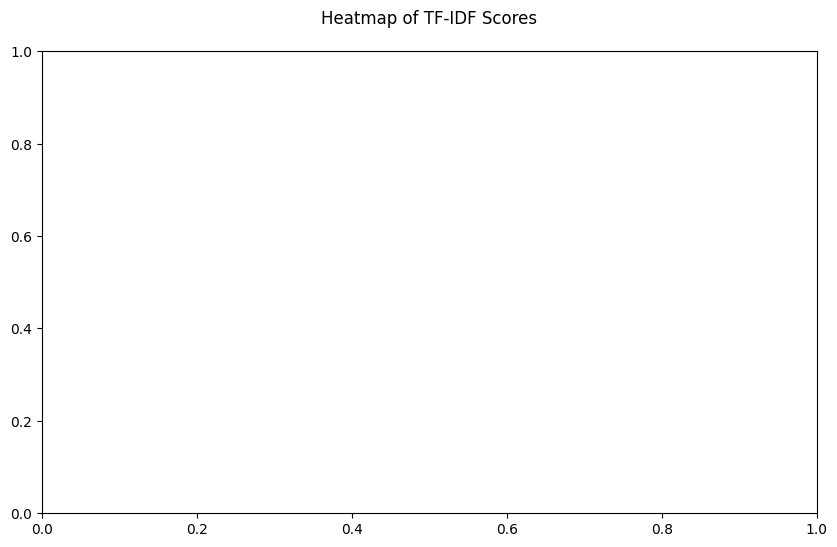

In [30]:
### Visualization ###

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df.head())
# Plotting
plt.figure(figsize=(10, 6))
plt.title('Heatmap of TF-IDF Scores', pad=20)
sns.heatmap(df, annot=True, fmt=".2f", cmap='viridian')
plt.xlabel('Terms')
plt.ylabel('Notes')
plt.show()

In [ ]:
note_index = 0  
recommendations = get_recommendations(note_index)

print(f"Recommendations for Note {note_index}:\n")
for idx, score in recommendations:
    print(f"Note {idx} with similarity score {score:.2f}: {notes[idx]}")
